In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [2]:
X=np.load('data_X.npy')
y=np.load('data_y.npy')

In [3]:
#train, validation set 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    #featurewise_center=True, #center 중심 유지
    #featurewise_std_normalization=True, #normalization
    rotation_range=25.0,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #brightness_range=[0.2,1.0],
    horizontal_flip=True) #수평방향 뒤집기

datagen.fit(X_train)

dgf=datagen.flow(X_train,y_train,batch_size=32)

Using TensorFlow backend.


In [5]:
from keras import models, layers
from keras import Input
from keras.applications import InceptionV3
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add

model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [8]:
#customizing my layers
additional_model = models.Sequential()
additional_model.add(model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4, activation='softmax'))

additional_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204804    
Total params: 22,007,588
Trainable params: 204,804
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [10]:
# checkpoint = ModelCheckpoint(filepath='My_VGG_{epoch:03d}_{val_loss:.7f}.hdf5',monitor='loss', mode='min', save_best_only=True)
checkpoint = ModelCheckpoint(filepath='Inception v3_fine tuning_1.hdf5', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)

In [11]:
import tensorflow as tf

additional_model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])

In [12]:
history = additional_model.fit_generator(dgf, 
            steps_per_epoch=150, 
            epochs=50, 
            validation_data=(X_val,y_val), 
            validation_steps=32, 
            callbacks=[checkpoint])

Epoch 1/50
150/150 [==============================] - 49s 329ms/step - loss: 1.3199 - acc: 0.4061 - auc: 0.6113 - precision: 0.4055 - recall: 0.1493 - f1score: 0.1169 - val_loss: 1.4221 - val_acc: 0.3341 - val_auc: 0.6661 - val_precision: 0.4806 - val_recall: 0.1953 - val_f1score: 0.1082
Epoch 2/50
150/150 [==============================] - 40s 267ms/step - loss: 1.1340 - acc: 0.4874 - auc: 0.6895 - precision: 0.5028 - recall: 0.2198 - f1score: 0.1330 - val_loss: 1.3605 - val_acc: 0.3853 - val_auc: 0.7088 - val_precision: 0.5227 - val_recall: 0.2406 - val_f1score: 0.1136
Epoch 3/50
150/150 [==============================] - 41s 270ms/step - loss: 1.0302 - acc: 0.5347 - auc: 0.7246 - precision: 0.5411 - recall: 0.2601 - f1score: 0.1424 - val_loss: 1.3623 - val_acc: 0.3958 - val_auc: 0.7377 - val_precision: 0.5534 - val_recall: 0.2765 - val_f1score: 0.1175
Epoch 4/50
150/150 [==============================] - 41s 271ms/step - loss: 0.9942 - acc: 0.5513 - auc: 0.7465 - precision: 0.5626 -

150/150 [==============================] - 41s 273ms/step - loss: 0.7203 - acc: 0.6695 - auc: 0.8473 - precision: 0.6500 - recall: 0.4776 - f1score: 0.1722 - val_loss: 1.5462 - val_acc: 0.4203 - val_auc: 0.8478 - val_precision: 0.6506 - val_recall: 0.4791 - val_f1score: 0.1232
Epoch 30/50
150/150 [==============================] - 41s 273ms/step - loss: 0.7030 - acc: 0.6808 - auc: 0.8484 - precision: 0.6513 - recall: 0.4807 - f1score: 0.1736 - val_loss: 1.4622 - val_acc: 0.4203 - val_auc: 0.8490 - val_precision: 0.6521 - val_recall: 0.4823 - val_f1score: 0.1237
Epoch 31/50
150/150 [==============================] - 41s 272ms/step - loss: 0.6787 - acc: 0.6986 - auc: 0.8496 - precision: 0.6530 - recall: 0.4839 - f1score: 0.1762 - val_loss: 1.4982 - val_acc: 0.4203 - val_auc: 0.8503 - val_precision: 0.6540 - val_recall: 0.4855 - val_f1score: 0.1228
Epoch 32/50
150/150 [==============================] - 41s 272ms/step - loss: 0.6962 - acc: 0.6816 - auc: 0.8509 - precision: 0.6546 - recall:

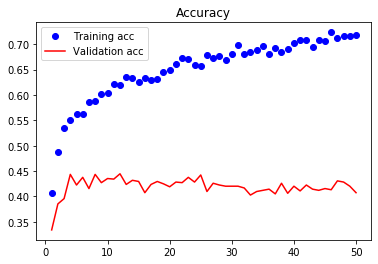

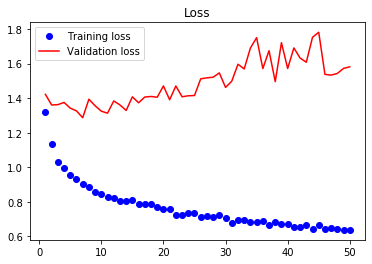

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [14]:
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

In [15]:
_loss, _acc, _auc, _precision, _recall, _f1score = additional_model.evaluate(X_val, y_val, batch_size=32)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

859/859 [==============================] - 2s 3ms/step
loss: 1.581, accuracy: 0.407, auc: 0.864, precision: 0.671, recall: 0.526, f1score: 0.124


In [16]:
_loss, _acc, _auc, _precision, _recall, _f1score = additional_model.evaluate(X_test, y_test, batch_size=32)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

704/704 [==============================] - 2s 3ms/step
loss: 10922.236, accuracy: 0.243, auc: 0.863, precision: 0.670, recall: 0.526, f1score: nan


In [17]:
additional_model.save('Inception v3_fine tuning_1.h5')